## Logistic Regression Basics and Feature examination methods

### Package Versions

In [1]:
import sys
import sklearn
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.feature_selection import f_classif, SelectPercentile
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

%matplotlib inline

print('The Python version is {}.\n'.format(sys.version))
print('The Numpy version is {}.\n'.format(np.__version__))
print('The Pandas version is {}.\n'.format(pd.__version__))
print('The Matplotlib version is {}.\n'.format(mpl.__version__))
print('The Scikit-Learn version is {}.\n'.format(sklearn.__version__))
print('The Seaborn version is {}\n'.format(sns.__version__))

The Python version is 3.8.5 (default, Jul 28 2020, 12:59:40) 
[GCC 9.3.0].

The Numpy version is 1.19.1.

The Pandas version is 1.1.0.

The Matplotlib version is 3.3.3.

The Scikit-Learn version is 0.24.0.

The Seaborn version is 0.11.1



### Load the data

In [2]:
df = pd.read_csv('data/default_of_credit_card_clients_cleaned.csv')

Make a list of all columns:

In [3]:
features_response = df.columns.to_list()
(features_response[:5], features_response[-5:])

(['id', 'limit_bal', 'sex', 'education', 'marriage'],
 ['education_cat', 'graduate_school', 'high_school', 'others', 'university'])

Removing gender (ethinics concern) and incorrect columns (pay_2, ..., pay_6). Also removing the ohe education features (for this case, they are already encoded into the education column):

In [4]:
to_remove = ['id', 'sex'] + ['pay_{}'.format(i) for i in range(2,7)] + features_response[-5:]
to_remove

['id',
 'sex',
 'pay_2',
 'pay_3',
 'pay_4',
 'pay_5',
 'pay_6',
 'education_cat',
 'graduate_school',
 'high_school',
 'others',
 'university']

In [5]:
features_response = [feature for feature in features_response if feature not in to_remove]
features_response

['limit_bal',
 'education',
 'marriage',
 'age',
 'pay_1',
 'bill_amt1',
 'bill_amt2',
 'bill_amt3',
 'bill_amt4',
 'bill_amt5',
 'bill_amt6',
 'pay_amt1',
 'pay_amt2',
 'pay_amt3',
 'pay_amt4',
 'pay_amt5',
 'pay_amt6',
 'default_payment_next_month']

### Pearson Correlation

The Pearson correlation is used to measure the strenght and direction (that is, positive or negative) of the linear relationship between a given pair of random variables $(X, Y)$. It is also known by linear correlation equation:

> $\rho_{X,Y} = \frac{\mathbb{E}[(X-\mu_{X})(Y-\mu_{Y})]}{\sigma_{X}\sigma_{Y}}$

Where:

$\sigma_{X}$ and $\sigma_{Y}$ are the standard deviation of $X$ and $Y$, respectively;
$\mu_{X}$ and $\mu_{Y}$ are the the mean of $X$ and $Y$, respectively;
$\mathbb{E}$ is the expectation (in other words, the **weighted average**).

If $X$ and $Y$ are both large/small (compared to their means) the correlation will be positive, otherwise, the correlation will be negative. The denominator (standard deviations product) serves to normalize the relationship on the -1 to +1 range.

One important note is that the Pearson correlation is only valid for **continuous data**, and not stricly appropriate for a binary response variable (though using with the latter case can give a quick idea of the potential usefulness of features). It is also ineffective when looking at data that are correlated but not in a linear way (e.g. sin/cos).

In [6]:
corr = df[features_response].corr()
corr

,limit_bal,education,marriage,age,pay_1,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_payment_next_month
limit_bal,1.000000,-0.232688,-0.111873,0.149157,-0.273396,0.287009,0.279289,0.285299,0.294342,0.295198,0.289818,0.194820,0.188049,0.207638,0.202795,0.218082,0.221305,-0.154423
education,-0.232688,1.000000,-0.137097,0.179035,0.112653,0.016156,0.012307,0.007683,-0.005862,-0.013174,-0.012670,-0.040092,-0.033610,-0.042349,-0.039319,-0.044946,-0.046859,0.034966
marriage,-0.111873,-0.137097,1.000000,-0.412828,0.019759,-0.028610,-0.026009,-0.029192,-0.027740,-0.029895,-0.024414,-0.002951,-0.007548,-0.003408,-0.014387,-0.000410,-0.009461,-0.026030
age,0.149157,0.179035,-0.412828,1.000000,-0.044277,0.056245,0.054099,0.054107,0.051241,0.049701,0.047519,0.025437,0.025421,0.029876,0.025307,0.020541,0.021640,0.014334
pay_1,-0.273396,0.112653,0.019759,-0.044277,1.000000,0.185826,0.188799,0.181257,0.178812,0.180438,0.177486,-0.081450,-0.073295,-0.072682,-0.064112,-0.057021,-0.061031,0.325365
bill_amt1,0.287009,0.016156,-0.028610,0.056245,0.185826,1.000000,0.951651,0.900386,0.860149,0.828615,0.802008,0.138221,0.112460,0.145635,0.160204,0.163425,0.178943,-0.020508
bill_amt2,0.279289,0.012307,-0.026009,0.054099,0.188799,0.951651,1.000000,0.937488,0.892103,0.858078,0.830300,0.276583,0.114473,0.137514,0.148685,0.153851,0.172472,-0.014579
bill_amt3,0.285299,0.007683,-0.029192,0.054107,0.181257,0.900386,0.937488,1.000000,0.930385,0.889186,0.855154,0.242809,0.287837,0.119456,0.141010,0.159446,0.178121,-0.014649
bill_amt4,0.294342,-0.005862,-0.027740,0.051241,0.178812,0.860149,0.892103,0.930385,1.000000,0.937799,0.899241,0.229123,0.217716,0.293652,0.131700,0.158633,0.171339,-0.011349
bill_amt5,0.295198,-0.013174,-0.029895,0.049701,0.180438,0.828615,0.858078,0.889186,0.937799,1.000000,0.945671,0.212053,0.189566,0.241291,0.296192,0.140669,0.161847,-0.006753


Plotting the correlation matrix using seaborn library:

<AxesSubplot:>

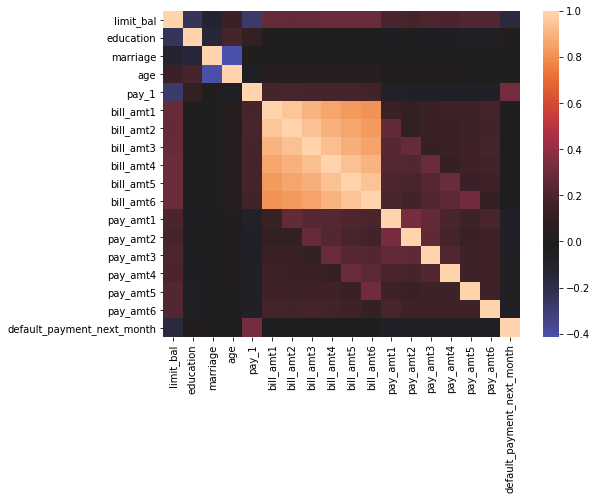

In [7]:
plt.figure(figsize=(8,6))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            center=0)

The correlation plot showed that the **pay_1** feature is probably the most strongly correlated feature with the *response variable*. It was possible to see that a number of features were highly correlated to each other, particularly the **bill_amt** features. Lastly, the **limit_bal** showed a negative correlation with the *response varible*.

### F-Test

The F-test, more specifcally, the **ANOVA (analysis of variabce) F-test** is used when we have a categorical independent variable assuming a normally distributed interval dependent (response) variables. Therefore, this kind of test is more suitable for the binary response variable for the study case. The **ANOVA F-test** can be contrasted with the **regression F-test**.

The formula for the one-way **ANOVA F-test** statistic is:

> $F = \frac{explained variance}{unexplained variance}$

The *explained variance* is:

> $\sum_{i=1}^{K} n_{i}(\bar{Y_{i}} - \bar{Y})^{2} / (K-1)$

Where $\bar{Y_{i}}$ denotes the sample mean in the i-th group, $n_{i}$ is the number of observations in the i-th group, $\bar{Y}$ denotes the overall mean of the data, and $K$ denotes the number of groups.

THe *unexplained variance* is:

> $\sum_{i=1}^{K} \sum_{j=1}^{n_{i}} (Y_{ij} - \bar{Y_{i}}^{2}) / (N - K)$

Where $Y_{ij}$ is the $j^{th}$ observation in the $i^{th}$ out of $K$ groups and $N$ is the sample size. The *F-statistic* follows hte *F-distribution* with degrees of freedom $d_{1} = K - 1$ and $d_{2} = N - K$ under the null hypothesis.

In [8]:
X = df[features_response].iloc[:, :-1].values
y = df[features_response].iloc[:, -1].values

[f_stat, f_p_value] = f_classif(X, y)

In [9]:
f_test_df = pd.DataFrame({'Feature': features_response[:-1],
                          'F_statistic': f_stat,
                          'p_value': f_p_value})
f_test_df.sort_values('p_value')

,Feature,F_statistic,p_value
4,pay_1,3156.672300,0.000000e+00
0,limit_bal,651.324071,5.838366e-142
11,pay_amt1,140.612679,2.358354e-32
12,pay_amt2,101.408321,8.256124e-24
13,pay_amt3,90.023873,2.542641e-21
15,pay_amt5,85.843295,2.090120e-20
16,pay_amt6,80.420784,3.219565e-19
14,pay_amt4,79.640021,4.774112e-19
1,education,32.637768,1.122175e-08
2,marriage,18.078027,2.127555e-05


The output consists of F-statistics, as well as p-values. The p-value is a useful concept of statistical measures and in this context answers the following question: "For the samples in the positive class, how likely is it that the average value of this feature is the same as that of samples in the negative class?". If a feature has very different average values between the positive and negative classes, it will:

- Be very unlikely that those average values are the same (low p-value)
- Probabli be a good feature in our model beaxuse it will help use discriminate between positive and negative classes

Note that for an increase in the p-value, there is also a decrease in the F-statistic value (the information in these two columns is essentially the same in terms of ranking features).

Looking at the results, the **pay_1** and **limit_bal** appeared to be the most useful featues, capable to discriminate well the reponse variable. These two features showed the smallest p-values, indicating the average values of these features between the positive and negative classes are **significantly different**.

#### Univariate Feature Selection

The F-test can help us select to select the the features that are most important when predicting an outcome, specially when there are a very large number of them (it is likely that many may be totally useless). For example, let's retreive the 20% features with the highest F-statistic using the *SelectPercentile* class (similar to the *SelectKBest* class):

In [10]:
selector = SelectPercentile(f_classif, percentile=20)
selector.fit(X, y)

SelectPercentile(percentile=20)

In [11]:
best_features_ix = selector.get_support()
best_features = [features_response[:-1][counter] 
                     for counter in range(len(features_response[:-1]))
                       if best_features_ix[counter]]
best_features

['limit_bal', 'pay_1', 'pay_amt1', 'pay_amt2']

#### Word of Caution

The F-test is usually usefull for multiclass clasification (here in this example, the F-test was reduced to a t-test because it only explores two different groups) and assumes that the data is **normally distributed**. This this wasn't checked. Another concern is that comparing the same response **y** to many potential features from the matrix **X**, a **multiple comparison** was done, and this may lead to incorrectness of what was told to be the "good feature". Therefore, the odds were increased when selecting them just by random chance, and they may not generalize well to new data. 

In short, there are statistical **corretions for multiple comparisons** that amount to adjusting the p-values found previously.

### Hipotheses and Next Steps

The **pay_1** is the payment status of the account, in the most recent month. Positive integers values indicate a dealy of payment by that many months, 0 means at least the minimum payment was made, -1 means balace paid in full and -2 means no account usage. This feature captures historical values of the response variable and are the strongest association with the response variable (the best predictor is this one, the **pay_1** is the historical data on the same thing that we are trying to predict). Thus, the following make sense: people who defaulted before are probably at the highest risk of defaulting again.

The second feature that influences a default in the next month is **limit_bal**. Thinking about how credit limits are assigned, it is likely that those ids that have lower limits are riskier in defaulting the next payment. So, we may expect to see a higher probability of default for accounts with lower values of **limit_bal**.

Let's explore the response variable and thse two in detail. Let's start with **pay_1**:

In [12]:
overall_default_rate = df.default_payment_next_month.mean()
overall_default_rate

0.2217971797179718

In [13]:
group_by_pay_mean_y = df.groupby('pay_1').agg({'default_payment_next_month': np.mean})
group_by_pay_mean_y

,default_payment_next_month
pay_1,
-2,0.131664
-1,0.170002
0,0.128295
1,0.336400
2,0.694701
3,0.773973
4,0.682540
5,0.434783
6,0.545455


Let's visualize this distribution:

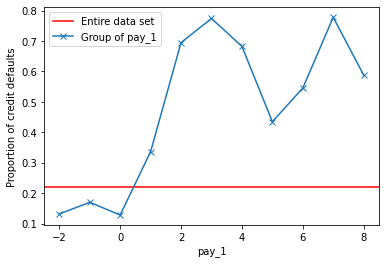

In [14]:
axes = plt.axes()
axes.axhline(overall_default_rate, color='red')
group_by_pay_mean_y.plot(marker='x', legend=False, ax=axes)
axes.set_ylabel('Proportion of credit defaults')
axes.legend(['Entire data set', 'Group of pay_1'])

The pattern is clear (and probably expected). Those who defaulted before are more likelly to default again. The default rate of accounts in good standing (-2, -1 and 0) were well below the overall defaul rate, which had a mean of 22%. However, at least 30% of the accounts that were in default last month defaulted again in the next month.

Let's look at the **limit_bal**:

Text(0.5, 1.0, 'Credit Limit by Response variable')

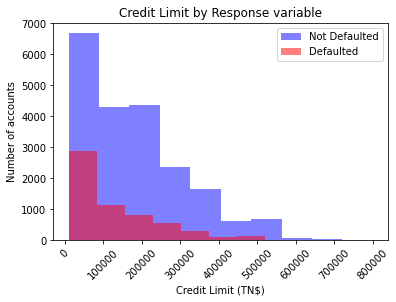

In [15]:
pos_mask = y == 1
neg_mask = y == 0

axes = plt.axes()
axes.hist(df.loc[neg_mask, 'limit_bal'], alpha=0.5, color='b')
axes.hist(df.loc[pos_mask, 'limit_bal'], alpha=0.5, color='r')
axes.tick_params(axis='x', labelrotation=45)
axes.set_ylabel('Number of accounts')
axes.set_xlabel('Credit Limit (TN$)')
axes.legend(['Not Defaulted', 'Defaulted'])
axes.set_title('Credit Limit by Response variable')

This histogram is not very informative, it just says that the number of defaults is higher for accounts with lower credit limits (as was already stated). Besides, it shows that accounts with lower limits is the majority in the sample (this was already known too). Let's normalize this distribution in order to analyze the proportions of default for each limit credit value (also known as **probability mass function**). Besides, let's raise the number of bins to capture some values between the thousands:

<ipython-input-16-5a8613f95537>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(np.round(y_ticks*50000, 2))


Text(0.5, 1.0, 'Normalized distributions of credit limits by response variable')

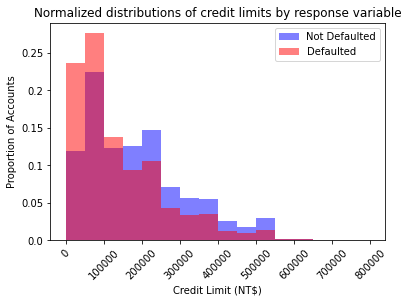

In [16]:
bin_edges = list(range(0, df.limit_bal.max() + 50000, 50000))

axes = plt.axes()
axes.hist(df.loc[neg_mask, 'limit_bal'], bins=bin_edges, alpha=0.5, density=True, color='blue')
axes.hist(df.loc[pos_mask, 'limit_bal'], bins=bin_edges, alpha=0.5, density=True, color='red')
axes.tick_params(axis='x', labelrotation=45)
axes.set_ylabel('Proportion of Accounts')
axes.set_xlabel('Credit Limit (NT$)')
y_ticks = axes.get_yticks()
axes.set_yticklabels(np.round(y_ticks*50000, 2))
axes.legend(['Not Defaulted', 'Defaulted'])
axes.set_title('Normalized distributions of credit limits by response variable')

From the above figure it was possible to see that the accounts that defaulted had lower credit limits. More or less 60% of the accounts that defaulted had a cred limit less than NT$ 150,000.00, being the high proportion in defaults. The previous hypothesis that the accounts with lower credit limit were likelier to default is sustained and evidenced by the distribution.

#### Word of Caution

When searching for features that have good predictive power using univariate selection, we are not considering the **interactions** between features (we are just looking at this independent variable alone). Also, the methods used so far only show linear effects and didn't use any kind of **transformation** to the variables. Such **transformations** as a **polynomial**, **logarithmic** or **binnig** can show relationships that are not linear. 

Interactions and transformations are examples of **feature engineering**, as well as creating new features.

### Understanding Logistic Regression and the Sigmoid Function

The mathematical function under the logistic regression is called **sigmoid** (also known as **logistic function**) and can be defined as:

> $f(X) = sigmoid(X) = \frac{1}{1 + e^{-X}}$

Let's plot the Sigmoid Function and understand its distribution:

Text(0.5, 1.0, 'The Sigmoid Function')

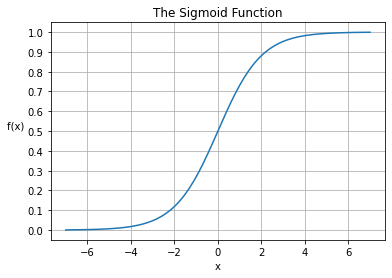

In [17]:
def sigmoid(X):
    """Calculates the sigmoid value of an input array with numpy."""
    Y = 1 / (1 + np.exp(-X))
    return Y

X_sig = np.linspace(-7, 7, 141)
Y_sig = sigmoid(X_sig)

plt.plot(X_sig, Y_sig)
plt.yticks(np.linspace(0, 1, 11))
plt.ylabel('f(x)     ', rotation=0)
plt.xlabel('x')
plt.grid()
plt.title('The Sigmoid Function')

The **sigmoid fuction** have the following behaviour. When the *x* value is very small, the denominator $1 + e^{-x}$ becomes very large and the image *f(x)* approaches 0. When the *x* value is too large the denominator $1 + e^{-X}$ becomes very close to 1 and the resultant fraction, *f(x)* aproaches 1. Therefore, the intuiton is that the **sigmoid function** stays between 0 and 1. The **sigmoid(0)** equals 0.5, because the denominator $1 + e^{-x}$ equals 2.

The importance of a **sigmoid funcion** is that the output is strictly bounded between 0 and 1, being practical into predicting probabilities in the range of 0 and 1.

#### Why is Logistic Regression considered a Linear Model?

A model is considered linear if the transformation of features that is used to calculate the prediction is a **linear combination** of the features. For example, in a simple model with two features, $X_{1}$ and $X_{2}$, a linear combination of these two variables take the form:

> $\theta_{0} + \theta_{1}X_{1} + \theta_{2}X_{2}$

Where the constants $\theta_{i}$ can be any number in a Field $\mathbb{F}$ (generally in the Reals $\mathbb{R}$).

Linear transformations do "not allow":

- Multiplying a feature by itself ($X_{1}^{2}$, which is called a polynomial term);
- Multiplying features together ($X_{1}X_{2}$, which is calles interactions);
- Applying non-linear transformations to the features such as $\log_{10}(X_{1})$ or $\sqrt{X_{2}}$.
- Other complex mathematical functions or "if then" type of statements such as "if $X_{1} \gt a$, then $y = b$"

Though the **sigmoid function** is clearly non-linear, a formulation of the sigmoid equation characterizes it as a linear. Such formulation is called **logit** and is solved by finding the inverse of the **sigmoid function**. Let's call the *p*, the probability of observing the positive class, the sigmoid value, then, solving for *X* we have:

> $p = \frac{1}{1 + e^{-X}} \Rightarrow$

> $1 + e^{-X} = \frac{1}{p} \Rightarrow$

> $e^{-X} = \frac{1}{p} - 1 = \frac{1 - p}{p}$

Then, applying the law of exponents we have:

> $\Rightarrow e^{X} = \frac{p}{1-p}$

And the law of logs:

> $\Rightarrow X = \log(\frac{p}{1-p}) = \log(\frac{p}{q})$

Where $q$ is the **probability of failure** and is expressed in terms of the **probability of success**, $p: q = 1 - p$. Such that the default of a payment is framed as a positive outcome and a "success" for the mathematical model. The **logit** function is also called the **log odds**, because it is the natural logarithm of the **odds ratio**, $\frac{p}{q}$.

Generally speaking, the capital *X* in the previous manipulations can stand for any linear combination of all features in a model, such as:

> $X = \theta_{0} + \theta_{1}X_{1} + ... + \theta_{j}X_{j}$

Then, the **sigmoid function** is expressed as the following:

> $p = \frac{1}{1 + e^{-(\theta_{0} + \theta_{1}X_{1} + ... + \theta_{j}X_{j})}}$

And thus, any feature included in *X* only subjects to a linear combination of the other variables when the response variable is considered to be the **log odds**. 

> $\theta_{0} + \theta_{1}X_{1} + ... + \theta_{j}X_{j} = \log(\frac{p}{q})$

Therefore, because of this way of looking at logistic regression, ideally the features of logistic regression model would be **linear in the log odds** of the response variable. This is why the Logistic regression is considered to be a linear model.

### Examining the Log Odds for pay_1 feature

Let's examine the log odds of default payment for various grups encountered in the **pay_1** feature. Let's first extract the probabilities of success and failure for each group:

In [18]:
p = group_by_pay_mean_y.default_payment_next_month.values
q = 1 - p

print(p)
print(q)

[0.13166397 0.17000198 0.12829525 0.33639988 0.69470143 0.7739726
 0.68253968 0.43478261 0.54545455 0.77777778 0.58823529]
[0.86833603 0.82999802 0.87170475 0.66360012 0.30529857 0.2260274
 0.31746032 0.56521739 0.45454545 0.22222222 0.41176471]


Let's calculate the odds ratio and their logs:

In [19]:
odds_ratio = p/q
odds_ratio

array([0.15162791, 0.20482215, 0.14717742, 0.50693161, 2.27548209,
       3.42424242, 2.15      , 0.76923077, 1.2       , 3.5       ,
       1.42857143])

In [20]:
log_odds_ratio = np.log(odds_ratio)
log_odds_ratio

array([-1.88632574, -1.58561322, -1.91611649, -0.67937918,  0.82219194,
        1.23088026,  0.76546784, -0.26236426,  0.18232156,  1.25276297,
        0.35667494])

Let's extract now the indexes for each group and plot the results:

Text(0.5, 0, 'Values of pay_1')

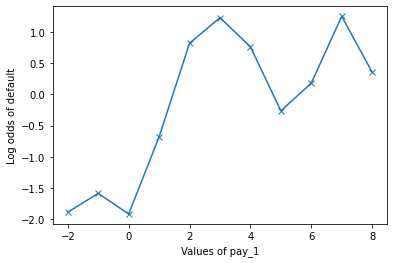

In [21]:
plt.plot(group_by_pay_mean_y.index, log_odds_ratio, '-x')
plt.ylabel('Log odds of default')
plt.xlabel('Values of pay_1')

It is possible to see from the previous figure that the relationship between the log odds of the response variable **pay_1** is not all that different from the relationship of the rate of default previously plotted. However, this plot shows exactly what is assumed to be linear in terms of logistic regression.

### Logistic Regression Prediction and Feature Space Decision Boundary

Let's assume that our model will have only two features, $X_{1}$ and $X_{2}$, and that we will use a Logistic Regression model to predict an outcome. Under these circunstances, we can write that the model as:

> $p = \frac{1}{1 + e^{-X}}$

Substituting the *X* as the linear combination of the two features, we have:

> $p = \frac{1}{1 + e^{-(\theta_{0} + \theta_{1}X_{1} + \theta_{2}X_{2})}}$

Assuming we are using a default threshold, then if $p >= 0.5$ the model will classify the record as a default payment, and negative otherwise. In other words, we can say the following:

$$\begin{equation}
p \text{ }\left\{ 
  \begin{aligned}
    &\ge 0.5, \text{ if }\theta_{0}\,+ \theta_{1}\,X_{1}\,+ \theta_{2}\,X_{2} \ge 0 \\
    &\lt 0.5, \text{ otherwise} \\
  \end{aligned}
  \right.
\end{equation}
$$


And we can calculate a linear condition for positive prediction in terms of the features $X_{1}$ and $X_{2}$, using the coefficients and intercept. Solving the inequality for positive prediction:

>$X \ge 0 \text{ for } X= \theta_{0} + \theta_{1}X_{1} + \theta_{2}X_{2}$

We obtain a linear inequality similar to a linear equation in $y = mx + b$:

>$X_{2} \ge -(\frac{\theta_{1}}{\theta_{2}})X_{1} - (\frac{\theta_{0}}{\theta_{2}})$

That help to understand the linear boundary of logistic regression in the $X_{1}$ and $X_{2}$ **feature space**.


#### Training a Logistic Regression using the two most important features

Let's use the two most predictable features that resulted from the univariate feature exploration and analyzed their features space. Let's first divide the samples into train and test splits and then train the model:

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    df[['pay_1', 'limit_bal']],
    df.default_payment_next_month,
    test_size=0.2,
    random_state=24)

print(X_train.shape)
print(X_test.shape)

(21331, 2)
(5333, 2)


In [23]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

Let's predict the labels:

In [24]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

print(model.coef_, model.intercept_)

[[ 8.27451187e-11 -6.80876727e-06]] [-6.57647457e-11]


Let's concatenate all the coeficients and the intercept that was calculated by the sklearn Logistic Regression:

In [25]:
intercept_and_coefs = np.concatenate([model.intercept_.reshape(1,1), model.coef_], axis=1)
intercept_and_coefs

array([[-6.57647457e-11,  8.27451187e-11, -6.80876727e-06]])

Let's pull from the trained model the coeficients and the intercept. Let's also create two masks that contain the true positive and true negative samples:

In [26]:
theta_0 = intercept_and_coefs[0][0]
theta_1 = intercept_and_coefs[0][1]
theta_2 = intercept_and_coefs[0][2]

X_1_decision_boundary = np.array([X_test.limit_bal.min(), X_test.limit_bal.max()])
X_2_decision_boundary = -(theta_1/theta_2) * X_1_decision_boundary - (theta_0/theta_2)

pos_true = df.default_payment_next_month == 1
neg_true = df.default_payment_next_month == 0

Let's plot the training samples with the decision boundary to see how the line separeted the samples: 

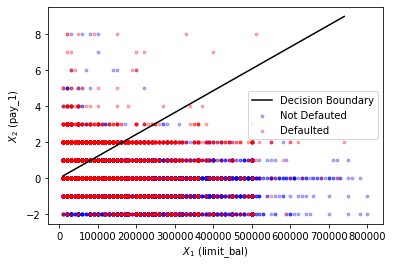

In [27]:
plt.plot(X_1_decision_boundary, X_2_decision_boundary, color='black')
plt.scatter(X_train.loc[neg_true, 'limit_bal'], X_train.loc[neg_true, 'pay_1'], color='blue', s=8, alpha=0.3)
plt.scatter(X_train.loc[pos_true, 'limit_bal'], X_train.loc[pos_true, 'pay_1'], color='red', s=8, alpha=0.3)
plt.ylabel('$X_2$ (pay_1)')
plt.xlabel('$X_1$ (limit_bal)')
plt.legend(['Decision Boundary', 'Not Defauted', 'Defaulted'])

From the figure above it is possible to see that the decision boundary couldn't discriminate well these two variables into positive and negative classes. Besides, it is already possible to say that the model will not perform very well as it struggled to find a clear boundary between the **limit_bal** and **pay_1** features.

Let's calculate the ROC AUC for the training data:

In [28]:
y_train_proba = model.predict_proba(X_train)
metrics.roc_auc_score(y_train, y_train_proba[:, 1])

0.6258817344546864

The ROC AUC score showed that only 62% of the training data was classified correctly. This information, combined with the decision boundary plot, evidences that the model will not perform much better than this into the test set.

Let's see. The next figure plots the decision boundary for the test set:

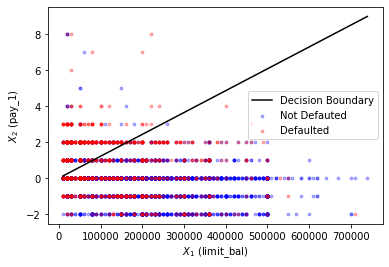

In [29]:
plt.plot(X_1_decision_boundary, X_2_decision_boundary, color='black')
plt.scatter(X_test.limit_bal.loc[neg_true], X_test.pay_1.loc[neg_true], color='blue', s=8, alpha=0.3)
plt.scatter(X_test.limit_bal.loc[pos_true], X_test.pay_1.loc[pos_true], color='red', s=8, alpha=0.3)
plt.ylabel('$X_2$ (pay_1)')
plt.xlabel('$X_1$ (limit_bal)')
plt.legend(['Decision Boundary', 'Not Defauted', 'Defaulted'])

As it was expected for the test set, the decision boundary didn't discrimitate well the features into the possible classes. The same observations for the training set can be applied to the test set.

#### Using the intercept and the coefficients to estimate the logistic regression model

Let's use the coefficients and the intercept to estimate how the model performed. First, let's create an array of features, with a column of 1s added using horizontal stacking. This will create a n by 3, being the first column of ones and the others with the **limit_bal** and **pay_1** features:

In [30]:
ones_and_features = np.hstack([np.ones((X_test.shape[0], 1)), np.array(X_test)])
ones_and_features

array([[ 1.0e+00,  2.0e+00,  1.6e+05],
       [ 1.0e+00,  1.0e+00,  5.0e+04],
       [ 1.0e+00, -1.0e+00,  2.0e+05],
       ...,
       [ 1.0e+00, -1.0e+00,  5.0e+04],
       [ 1.0e+00,  1.0e+00,  2.3e+05],
       [ 1.0e+00,  2.0e+00,  1.0e+05]])

Now the following lines will repeatedly multiply the intercept and coefficients by all the rows of **ones_and_features** and take the sum of each row. This is nothing more than calculating the **linear combination** of the features we want to use. Let's do this using the mathematical concept of **dot product**: 

In [31]:
X_lin_comb = np.dot(intercept_and_coefs, np.transpose(ones_and_features))
X_lin_comb

array([[-1.08940276, -0.34043836, -1.36175345, ..., -0.34043836,
        -1.56601647, -0.68087673]])

Now **X_lin_comb** has the argument resultant argument *X* that we need to use into the sigmoid function defined previously:

In [32]:
y_pred_proba_manual = sigmoid(X_lin_comb)
y_pred_proba_manual

array([[0.25173076, 0.415703  , 0.20395547, ..., 0.415703  , 0.17278502,
        0.33606565]])

This achieves the same result as using the sklearn pred_proba:

In [33]:
y_pred_proba

array([[0.74826924, 0.25173076],
       [0.584297  , 0.415703  ],
       [0.79604453, 0.20395547],
       ...,
       [0.584297  , 0.415703  ],
       [0.82721498, 0.17278502],
       [0.66393435, 0.33606565]])

Using a threshold of 0.5, let's see how well the classifier did in the test set. Let's also compare the results using the sklearn:

In [34]:
y_pred_manual = y_pred_proba_manual >= 0.5
np.array_equal(y_pred.reshape(1, -1), y_pred_manual)

True

Let's calculate the ROC AUC using both sciki-learn's predicted probabilities and the manually predicted probabilities:

In [35]:
metrics.roc_auc_score(y_test, y_pred_proba_manual.reshape(y_pred_proba_manual.shape[1],))

0.627207450280691

In [36]:
metrics.roc_auc_score(y_test, y_pred_proba[:, 1])

0.627207450280691

Using these two variables together the performance of the model was slightly boosted to 0.63. Using just **limit_bal** as a feature predictor the ROC AUC value was abit less than 0.62. So other techniques are still needed to make a better model to this dataset. 


The AUCs are the same. This last part showed that it is possible to mesure the performance of a model with mathematical understanding of the process. In an environment without python, but with the correct parameters (in this case the intercept and coefficients) it is possible to calculate how well the model did in deployed environments that have different programming languages or tools (e.g. SQL).

